In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd_data = pd.read_csv('./Reviews.csv')[:10000]
pd_data['UserId'].value_counts()
Sort=pd_data.groupby(['UserId','ProfileName'],as_index=False)['Score'].agg({'Score count':'count','Score mean':'mean'}).sort_values('Score count', ascending=False)[:10]
Sort

,UserId,ProfileName,Score count,Score mean
2330,A1Z54EM24Y40LL,c2,17,3.882353
4286,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
5169,A35R32TA60XD57,M. Torma,9,4.111111
2919,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
6442,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
6330,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6493,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
8390,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
2826,A26NFIQ7KWI8Y7,kt rose,6,2.666667
31,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


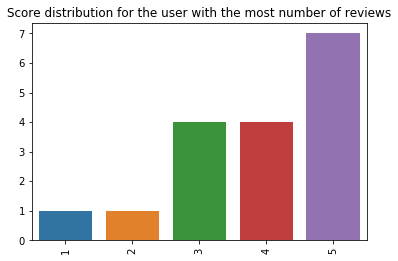

In [15]:
import seaborn as sns
user=pd_data[pd_data["UserId"]=="A1Z54EM24Y40LL"]
bar=sns.countplot(data=user,x='Score')
bar.set(xlabel='',ylabel='')
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
plt.title('Score distribution for the user with the most number of reviews')
plt.show()

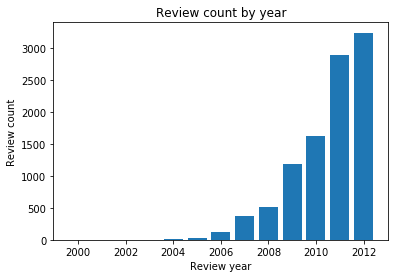

In [16]:
data=pd.DataFrame()
data["Year"]=pd.to_datetime(pd_data["Time"],unit='s').dt.year
year=data.groupby('Year')
year_count=year.size().reset_index(name='Review Count')

plt.bar(year_count['Year'],year_count['Review Count'])
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title("Review count by year")
plt.show()


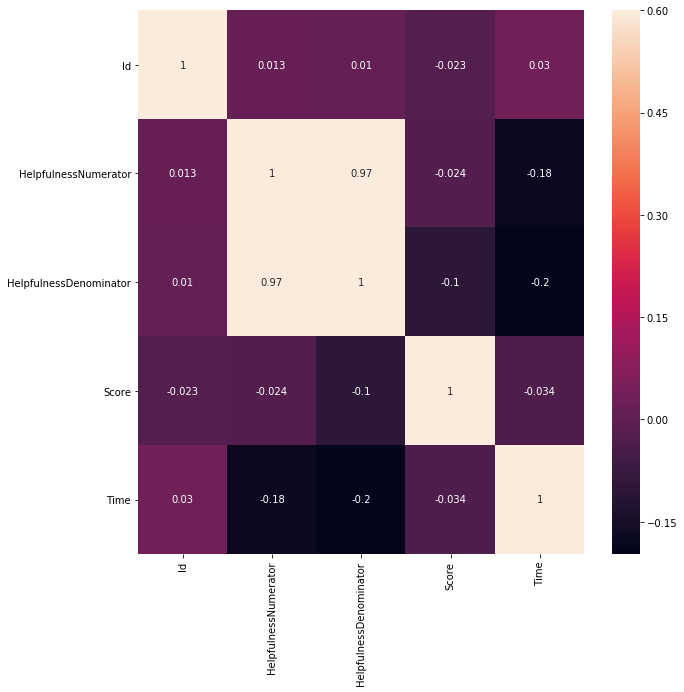

In [26]:
heat_df=pd_data[["Id","HelpfulnessNumerator","HelpfulnessDenominator","Score","Time"]]
corr_matrix=heat_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,vmax=0.6,annot=True,annot_kws={'size':10})
plt.show()



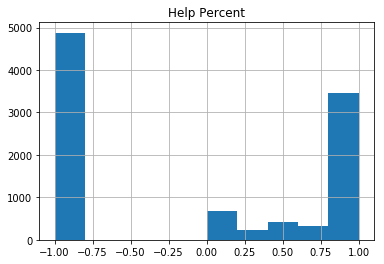

In [32]:
pd_data["Helpful percent"]=pd_data["HelpfulnessNumerator"]/pd_data["HelpfulnessDenominator"]
pd_data=pd_data.fillna(-1)
pd_data=pd_data[pd_data["Helpful percent"]<=1]
plt.hist(pd_data["Helpful percent"])
plt.title("Help Percent")
plt.grid(True)